## Till Now

*1.Python*


*2.Data Toolkit:- Python Libraries*


*3.EDA*

*4.Statistics*

*5.Introduction to ML*

*6.Core Machine Learning*

# Agenda

 **1. Linear Regression**

 *1. Intution*

 *2. Mathematical Explanation*

 *3. Implementation*

**Intution**

Problem Statement <---> Data Understanding <----> Data Preparation <----> Model Building <---> Model Evaluation

# Simple Linear Regression(Supervised ML Algorithm)

*Legendre developed in 1805 & Gauss in 1809. Term Regression is pointed by Francis Galton*

*R.A. Fisher --> Major Contribution*

# Simple Linear Regression (Lecture-02)

# Agenda

**Till Now:-**

*1. Intution of SLR*

*2. Error Term*

**Agenda:-**

1. Problem Statement in various form.

2. Implementation

# Simple Linear Regression Implementation

**Agenda:-**

1. SLR Implementation

2. MLR

3. Evaluation Metrics ( R Square, Adjusted R Square, MAE, MSE, RMSE )

4. Polynomial Regression

**ML Pipeline:-**

1. Read the dataset

2. Prepare the dataset

3. Feature Engeenering

4. Divide the data into X and Y

5. Divide the data into train & test.

6. Feature Scaling (Optional)

7. Model Training

8. Model Evaluation

**Simple Linear Regression:-**

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
# Read the data
from sklearn.datasets import load_diabetes

In [43]:
diabetes = load_diabetes() # Reading the dataset

In [44]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [45]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [46]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [47]:
# Problem Statement is to predict desease progression one year after  using  10 Features

In [48]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [49]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [50]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [51]:
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [52]:
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [53]:
# Business team understand the target variable depend upon problem statement

In [54]:
data['target'] = diabetes.target  # Adding coloumn target variable

In [55]:
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [56]:
## 2nd Step is EDA & Feature Engeenering (This data is already prepared so we don't need to worry about that.)

In [57]:
## 3rd Step =>> Divide the data into X and y

In [58]:
## Simple Linear Regression
x= data[['bmi']]
y= data['target']

In [59]:
x

,bmi
0,0.061696
1,-0.051474
2,0.044451
3,-0.011595
4,-0.036385
...,...
437,0.019662
438,-0.015906
439,-0.015906
440,0.039062


In [60]:
y

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=111)

In [63]:
x_train

,bmi
382,0.060618
195,0.025051
391,-0.069797
117,-0.021295
337,-0.012673
...,...
275,-0.011595
86,-0.075186
212,0.003494
364,-0.006206


In [64]:
# Scaling
# Model training

x_train.shape

(353, 1)

In [65]:
x_train.mean()

,0
bmi,0.000313


In [66]:
# After train,test,split we can do the model training using x_train and testing using x_test

In [67]:
#Model Training

from sklearn.linear_model import LinearRegression

*Fit:-* Calculate the parameter what we have.

*Transform:-* Apply the parameter on formula to transform.

*Fit-Transform is done on Train data and only transform is done on test data.*

Fit means training the model and predict means predict on the dataset. Fit can be done on x_train but predict can be done on both train and test.

In [68]:
model = LinearRegression()

In [69]:
model

LinearRegression()

In [70]:
model.fit(x_train,y_train)

LinearRegression()

In [71]:
model.coef_ # m , beta1

array([967.56370916])

In [72]:
model.intercept_ #c, betanot

150.90412145452734

In [73]:
y_pred = model.predict(x_test)

In [74]:
y_pred

array([275.25594645, 114.65676186, 145.9423173 , 176.18502089,
       164.71365056, 150.11372469, 157.41368763, 122.99957664,
       155.32798393, 128.21383588, 180.35642828, 143.8566136 ,
       240.84183547, 202.25631709, 133.42809512, 191.82779861,
       131.34239143, 146.98516915, 194.95635416, 164.71365056,
       134.47094697, 143.8566136 , 119.8710211 , 182.44213198,
        88.58546566, 132.38524328,  86.49976196, 111.52820632,
       173.05646535, 178.27072459, 199.12776155, 115.69961371,
       127.17098404, 208.51342818, 133.42809512, 138.64235436,
       121.9567248 , 120.91387295, 159.49939132, 145.9423173 ,
       185.57068752, 217.89909481, 127.17098404, 144.89946545,
       142.81376176, 109.44250262, 155.32798393,  82.32835457,
       156.37083578, 164.71365056, 170.97076165, 148.028021  ,
       229.37046514,  72.94268794, 183.48498383,  92.75687305,
       115.69961371, 167.84220611,  99.01398414, 126.12813219,
       104.22824338, 115.69961371, 168.88505796,  87.54

# Model Evaluation

**Evaluation Metrics:-**


**1.R^2**

**2. Adjusted R^2**

**3. MSE**

**4. RMSE**

**5. MAE**

*R^2 means Variation in Y expected => X is capturing Y well.*

**X is capturing Y well--> Error(SSE) will be low ==> The model will be  better**

Ques:- Can R^2 be negative ?



Ans:- Yes R^2 can be negative.

Increment in feature will increase the value of R^2 will improve or remain as it is i.e. constant.

**Adjusted R^2:-** It penalizes R^2 as we add new features.

It increases if R^2 increases and as R^2 is contant and there is no enough increment in R^2 then adjusted R^2 will decrease.

*Only add features is the model if the difference  between R^2 and adjusted R^2 is not more than 5%.*

Adjusted R^2 <= R^2

**MSE:-**

*We generally use mean square error because outlier treatment is done in most of the cases if it is not done we use Root mean square error*

# Implementation

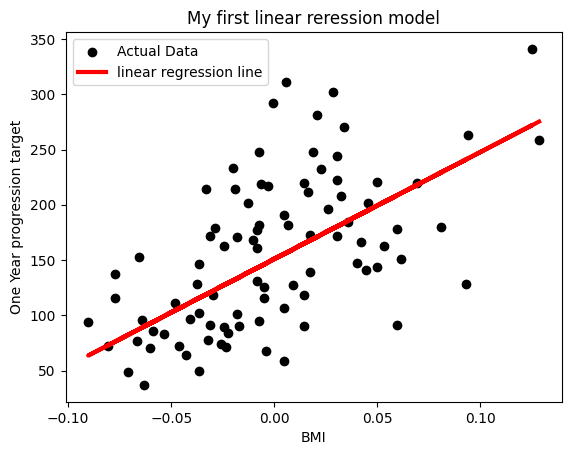

In [75]:
## Visualize the results
plt.scatter(x_test,y_test,color = 'black', label = 'Actual Data' )
plt.plot(x_test,y_pred,color = 'red',linewidth = 3,label = 'linear regression line')
plt.xlabel("BMI")
plt.ylabel("One Year progression target")
plt.title("My first linear reression model")
plt.legend()
plt.show()


# Simple Linear Regression Model-2

In [79]:
df = pd.read_csv('/content/height-weight (1).csv')

In [80]:
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


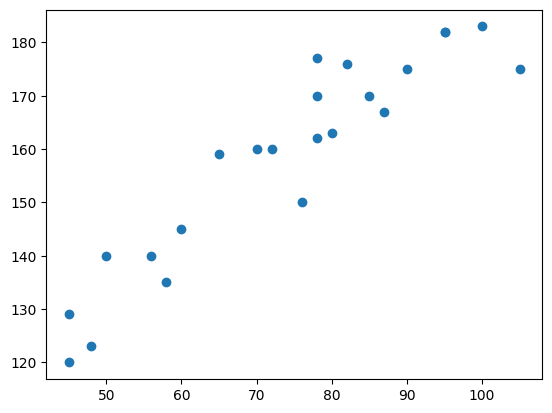

In [82]:
plt.scatter(df.Weight,df.Height)
plt.show()

In [83]:
# Divide the data into x,y
x= df[['Weight']]
y= df[['Height']]

In [84]:
x

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [85]:
y

,Height
0,120
1,135
2,123
3,145
4,160
5,162
6,163
7,175
8,182
9,170


In [86]:
## Train,test,split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size = 0.3, random_state=1)

In [87]:
x_train

,Weight
4,70
2,48
18,76
6,80
7,90
1,58
14,85
0,45
15,78
22,72


In [88]:
y_train

,Height
4,160
2,123
18,150
6,163
7,175
1,135
14,170
0,120
15,177
22,160


In [89]:
# Scaling
from sklearn.preprocessing import StandardScaler

In [92]:
scaler = StandardScaler()

In [93]:
x_train

,Weight
4,70
2,48
18,76
6,80
7,90
1,58
14,85
0,45
15,78
22,72


In [94]:
# On  Train Data >> fit & transform
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [95]:
x_train

array([[-0.33596868],
       [-1.6647437 ],
       [ 0.0264245 ],
       [ 0.26801996],
       [ 0.8720086 ],
       [-1.06075505],
       [ 0.57001428],
       [-1.84594029],
       [ 0.14722223],
       [-0.21517095],
       [-1.18155278],
       [ 0.14722223],
       [ 1.17400292],
       [ 1.77799157],
       [ 1.17400292],
       [ 0.14722223]])

In [96]:
x_test

array([[-1.84594029],
       [-0.637963  ],
       [-0.93995732],
       [ 1.47599724],
       [ 0.69081201],
       [-1.54394597],
       [ 0.38881769]])

In [97]:
## Model Training

from sklearn.linear_model import LinearRegression

In [99]:
reg = LinearRegression()

In [100]:
reg

LinearRegression()

In [101]:
reg.fit(x_train,y_train)

LinearRegression()

In [103]:
print("The coef is", reg.coef_)
print("The intercept is", reg.intercept_)

The coef is [[17.96866211]]
The intercept is [159.]


In [104]:
## y_pred = intercept + coef(x)
# 159+ x_train*17

In [105]:
reg.predict(x_train)

array([[152.96309227],
       [129.08678304],
       [159.47481297],
       [163.8159601 ],
       [174.66882793],
       [139.93965087],
       [169.24239401],
       [125.83092269],
       [161.64538653],
       [155.13366584],
       [137.76907731],
       [161.64538653],
       [180.09526185],
       [190.94812968],
       [180.09526185],
       [161.64538653]])

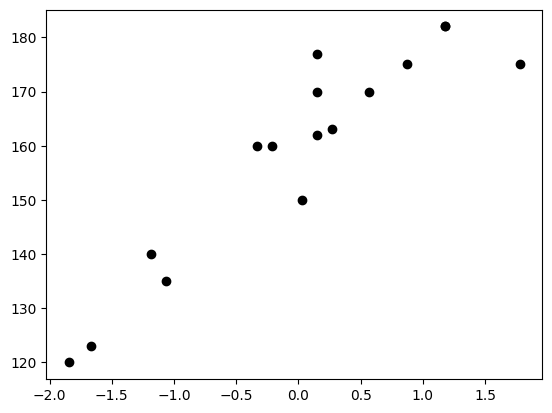

In [106]:
plt.scatter(x_train,y_train,color = 'black', label = 'Actual Data' )

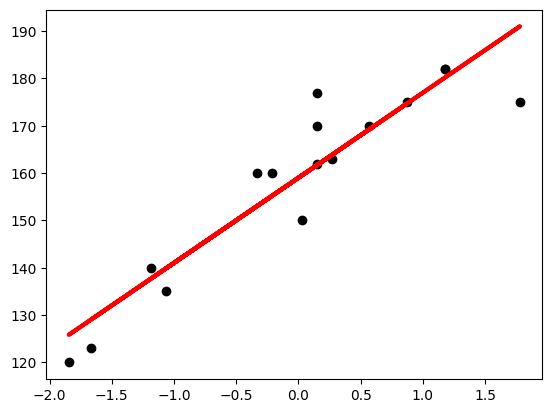

In [108]:
plt.scatter(x_train,y_train,color = 'black', label = 'Actual Data' )
plt.plot(x_train,reg.predict(x_train),color = 'red',linewidth = 3)

In [109]:
y_pred_test = reg.predict(x_test)

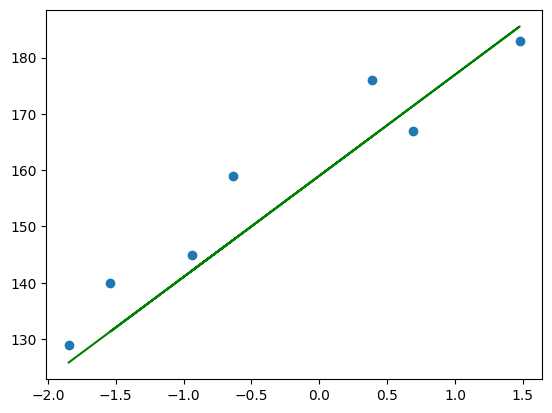

In [111]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred_test,'g')

In [112]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [113]:
mean_squared_error(y_test,y_pred_test)

50.33408704814381

In [114]:
mean_absolute_error(y_test,y_pred_test)

6.173281083006771

In [115]:
np.sqrt(mean_squared_error(y_test,y_pred_test))

7.09465200331516

In [116]:
r2_score(y_test,y_pred_test) # 85 % of y is explained by x , rsquare o to 1

0.850577349729853

In [117]:
#adj rsquare = 1-(1-rsq)*N-1/n-p-1

In [118]:
score = r2_score(y_test,y_pred_test)

In [119]:
score

0.850577349729853

In [120]:
x_test.shape[1]

1

In [121]:
1- (1-score)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)

0.8206928196758236